Imports to featurize and load data

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance
from DanceProj1.data_proc import get_data, data_to_features


Imports for Automl

In [2]:
import autosklearn.classification
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.datasets
import sklearn.metrics

In [3]:
#make sure autosklearn is here
print('autosklearn: %s' % autosklearn.__version__)

autosklearn: 0.15.0


Data loaded as two dataframes of dances by features, one for basic and one for advanced movement sequences.

In [4]:
aistpath = '../../aist_keypoints'      #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data
dfBasic, dfAdvanced = data_to_features(dataBM, dataFM)  #get features as dataframes


In [5]:
#make new indexes for Advanced, starting after last index in Basic, for unique index per id
new_index_advanced = range(len(dfBasic.index), len(dfBasic.index)+len(dfAdvanced.index))
dfAdvanced.index = dfAdvanced.index + new_index_advanced
dfAdvanced.head()

,Expandedness,Expandedness_std,Expandednessvel,Expandednessvel_std,Expandednessacc,Expandednessacc_std,Asym_RL_vel,Asym_RL_acc,Asym_RL_jer,Asym_RL_vel_std,...,Contracorr_Relb_Lknee_prominencej2,Contracorr_Relb_Lknee_prominencej3,Contracorr_Relb_Lknee_prominencej_std,Contracorr_Lelb_Rknee_heightjer,Contracorr_Lelb_Rknee_prominencej1,Contracorr_Lelb_Rknee_prominencej2,Contracorr_Lelb_Rknee_prominencej3,Contracorr_Lelb_Rknee_prominencej_std,id,Genre
1199,1056.865643,90.082477,1538.228504,958.219385,7666.414735,3900.555376,2839.095566,3202.027147,-8145.973932,6.328799,...,1.664854e+09,1.434043e+09,1.443755e+08,7.402209e+07,1.229382e+09,1.192352e+09,1.179422e+09,2.117252e+07,gBR_sFM_cAll_d05_mBR2_ch09,Break
1201,1031.250205,115.045741,2035.464041,966.684795,10537.243423,4651.213150,-498.891513,248.747443,687.314989,7.118658,...,1.652572e+09,1.376125e+09,1.661897e+08,6.394800e+08,1.357771e+09,1.261664e+09,8.891055e+08,2.021232e+08,gBR_sFM_cAll_d06_mBR5_ch19,Break
1203,1264.589529,654.019537,3468.162657,2929.231708,17493.828054,14958.905140,2277.125602,1744.592252,-1649.130332,30.364511,...,3.830212e+09,3.618890e+09,1.640630e+09,1.340948e+09,4.431559e+09,4.308251e+09,2.924700e+09,6.831335e+08,gBR_sFM_cAll_d05_mBR5_ch14,Break
1205,1100.526992,108.640735,1619.546822,761.437478,8351.133624,3748.230439,1330.346396,-3083.023419,-94451.348976,15.941952,...,1.614114e+09,1.565013e+09,1.055785e+08,3.317929e+08,1.771329e+09,1.737268e+09,1.393618e+09,1.705940e+08,gBR_sFM_cAll_d04_mBR5_ch06,Break
1207,1012.354348,101.102753,1380.734980,483.503378,6921.930683,2232.699927,2425.553893,-3654.077082,2469.866960,19.227707,...,1.208936e+09,1.112264e+09,1.159281e+08,3.778749e+08,1.274994e+09,9.255891e+08,9.058842e+08,1.695464e+08,gBR_sFM_cAll_d06_mBR2_ch16,Break


In [6]:
#alphabetize dfs by genre (to avoid reordering by classifiers later)
dfBasic = dfBasic.sort_values(by='Genre')
dfAdvanced = dfAdvanced.sort_values(by='Genre')
dfAdvanced.head()

,Expandedness,Expandedness_std,Expandednessvel,Expandednessvel_std,Expandednessacc,Expandednessacc_std,Asym_RL_vel,Asym_RL_acc,Asym_RL_jer,Asym_RL_vel_std,...,Contracorr_Relb_Lknee_prominencej2,Contracorr_Relb_Lknee_prominencej3,Contracorr_Relb_Lknee_prominencej_std,Contracorr_Lelb_Rknee_heightjer,Contracorr_Lelb_Rknee_prominencej1,Contracorr_Lelb_Rknee_prominencej2,Contracorr_Lelb_Rknee_prominencej3,Contracorr_Lelb_Rknee_prominencej_std,id,Genre
1615,1065.821287,100.792451,1735.653100,750.213614,8434.501762,3851.117291,2450.308351,669.453048,447.942426,10.535955,...,2.437719e+09,1.671086e+09,3.757403e+08,8.700107e+08,1.874843e+09,1.795367e+09,1.583052e+09,1.231693e+08,gJB_sFM_cAll_d07_mJB2_ch03,Ballet Jazz
1577,943.558702,94.981145,1440.802249,833.489400,7682.011394,5091.582272,-2047.497225,34163.471185,-241.612173,12.147221,...,1.778878e+09,1.684116e+09,2.406442e+08,8.035391e+09,1.480005e+10,9.934780e+09,6.696022e+09,3.330592e+09,gJB_sFM_cAll_d09_mJB5_ch20,Ballet Jazz
1579,1016.357632,99.647915,1285.371478,587.623914,5784.954412,2807.437497,2195.687077,1578.601247,1954.705135,6.754464,...,9.035397e+08,7.964862e+08,8.472218e+07,1.002533e+09,1.734618e+09,1.686987e+09,1.495129e+09,1.035124e+08,gJB_sFM_cAll_d08_mJB3_ch11,Ballet Jazz
1581,952.453800,100.915748,1349.334022,759.992458,6434.637824,4151.000950,-33921.557899,1804.898380,-12073.446919,147.646347,...,2.006960e+09,1.939330e+09,4.561662e+08,8.840435e+08,3.678480e+09,3.672786e+09,2.399304e+09,6.016718e+08,gJB_sFM_cAll_d09_mJB1_ch16,Ballet Jazz
1583,986.565303,106.354552,1250.544711,716.203115,6256.392835,3838.150549,979.998271,-8376.755982,7664.762826,5.987970,...,1.379766e+09,9.206970e+08,3.159570e+08,6.021521e+08,1.457539e+09,1.285451e+09,1.222143e+09,9.946194e+07,gJB_sFM_cAll_d07_mJB4_ch05,Ballet Jazz


Test set is to be composed only of Advanced dances. Most of the data is Basic dances, with each choreography performed with slight variations. Below is a custom splitting function (see data_proc) for getting an all-Advanced Test, and a mix of Advanced and Basic for validation.  
   
Here we use 10 dances from each genre (100 total) for Test, 2 from each genre in Validation, and the remaining ~9 Advanced from each in Train. This leaves 14-Basic-per-genre for validation, and ~105-Basic-per-genre for Train.    


In [7]:
from DanceProj1.data_proc import traintestval_split
train, valid, testset = traintestval_split(dfBasic, dfAdvanced, testfrac_adv=.5, testfrac_bas=0, valfrac_adv_nonT=.2, valfrac_bas=.12)

In [8]:
testset.loc[testset.Genre=='House'].head()

,Expandedness,Expandedness_std,Expandednessvel,Expandednessvel_std,Expandednessacc,Expandednessacc_std,Asym_RL_vel,Asym_RL_acc,Asym_RL_jer,Asym_RL_vel_std,...,Contracorr_Relb_Lknee_prominencej2,Contracorr_Relb_Lknee_prominencej3,Contracorr_Relb_Lknee_prominencej_std,Contracorr_Lelb_Rknee_heightjer,Contracorr_Lelb_Rknee_prominencej1,Contracorr_Lelb_Rknee_prominencej2,Contracorr_Lelb_Rknee_prominencej3,Contracorr_Lelb_Rknee_prominencej_std,id,Genre
1445,899.662162,55.879398,1227.287800,413.422803,6457.155711,2228.122518,-1129.478986,1023.242998,738.392074,4.498651,...,5.946358e+08,5.643260e+08,2.853446e+07,8.982543e+08,1.678000e+09,1.371023e+09,1.306400e+09,1.621035e+08,gHO_sFM_cAll_d19_mHO5_ch06,House
1433,1030.034324,67.294539,1694.467046,610.983554,8257.222844,2983.687749,-3343.373931,6927.332775,2720.499263,14.589017,...,1.363984e+09,1.058428e+09,1.462307e+08,1.147529e+08,1.398055e+09,1.377998e+09,1.135556e+09,1.192969e+08,gHO_sFM_cAll_d21_mHO3_ch18,House
1411,911.598974,69.306864,1467.226192,478.671268,7707.743650,2583.242409,1628.978593,627.919242,-3038.095561,3.106333,...,1.092473e+09,1.036731e+09,2.391283e+08,6.565588e+08,1.214404e+09,1.134712e+09,1.109461e+09,4.472297e+07,gHO_sFM_cAll_d19_mHO2_ch07,House
1431,1026.761618,74.919079,1904.470267,643.834194,10026.898632,3370.920958,-239.876826,2343.001385,-1244.847342,4.162597,...,1.975533e+09,1.559996e+09,2.697175e+08,1.577067e+09,2.621326e+09,1.729645e+09,1.622309e+09,4.477911e+08,gHO_sFM_cAll_d20_mHO1_ch09,House
1409,1022.394700,77.089159,1520.848294,527.779648,7753.914176,2774.999882,2006.037578,-222.037879,-4700.990933,11.292699,...,1.341113e+09,1.156458e+09,2.053494e+08,3.999337e+08,2.504699e+09,2.030513e+09,1.475123e+09,4.207583e+08,gHO_sFM_cAll_d21_mHO4_ch19,House


The dfs above include ID, for later evaluation. This column should be removed from input.  

traintestval_split also includes genre, which is our target label in this classification task and should accordingly be removed from x and used for y.

In [9]:
test_ids = testset['id']
index_lookup = pd.DataFrame(
               testset.index, columns=['original_index']) #lookup table for original index

X_test = testset.drop(['Genre'], axis=1).drop(['id'], axis=1)
y_test = testset['Genre']

X_valid = valid.drop(['Genre'], axis=1).drop(['id'], axis=1)
y_valid = valid['Genre']

X_train = train.drop(['Genre'], axis=1).drop(['id'], axis=1)
y_train = train['Genre']

In [10]:
# check the shape 
for item in [X_train, X_test, X_valid, y_valid, y_train, y_test]:
  print(item.shape)

(1148, 104)
(100, 104)
(160, 104)
(160,)
(1148,)
(100,)


In [16]:
labels = list(y_test.unique())
print(labels)

['Ballet Jazz', 'Break', 'House', 'Krump', 'LAhop', 'Lock', 'Midhop', 'Pop', 'Street Jazz', 'Waack']


Let's see how a Perceptron does (skipping validation)

In [11]:
from sklearn.linear_model import Perceptron
preg = Perceptron(tol=.05, max_iter=2000, alpha=.00001).fit(X_train, y_train)
print('Perceptron is at chance: Score =', preg.score(X_test, y_test))

Perceptron is at chance: Score = 0.1


Let's see how a Ridge Classifier does (skipping validation)

In [12]:
#Let's see how a ridge classifier does
from sklearn.linear_model import RidgeClassifier
rreg = RidgeClassifier().fit(X_train, y_train)
print('RidgeClassifier is better than chance, but not great. Score =',rreg.score(X_test, y_test))

RidgeClassifier is better than chance, but not great. Score = 0.5


/home/tbenbaker/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.52614e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Let's see how XGBoost does (skipping validation)

In [27]:
#convert to numeric labelsfor xgb
y_trainxgb = y_train.replace(labels, range(len(labels)), regex=True)
y_validxgb = y_valid.replace(labels, range(len(labels)), regex=True)
y_testxgb = y_test.replace(labels, range(len(labels)), regex=True)

print(y_testxgb)

1605    0
1593    0
1581    0
1611    0
1609    0
       ..
1479    9
1483    9
1455    9
1451    9
1459    9
Name: Genre, Length: 100, dtype: int64


In [28]:
import xgboost as xgb
xgb_mod = xgb.XGBClassifier(objective='multi:softprob', random_state=42, n_jobs=16)
xgb_mod.fit(X_train, y_trainxgb)
print('XGBoost is not bad. Score =',xgb_mod.score(X_test, y_testxgb))

XGBoost is not bad. Score = 0.59


In [30]:
y_hatp1 = xgb_mod.predict_proba(X_test)
print(y_hatp1[:5])

[[2.21340165e-01 1.11120835e-01 3.71732912e-03 5.97326597e-03
  8.95645190e-03 1.00800209e-02 6.17810786e-01 7.49257533e-03
  6.84311800e-03 6.66548405e-03]
 [6.59394801e-01 3.29738110e-02 7.10075197e-04 2.78233826e-01
  2.72338837e-03 3.89358238e-03 1.31406849e-02 3.40115582e-03
  2.34655128e-03 3.18207848e-03]
 [9.86151397e-01 2.32502096e-03 4.39459080e-04 5.25681302e-04
  5.63064939e-04 6.82962965e-03 4.54590132e-04 9.21996078e-04
  1.09772547e-03 6.91500027e-04]
 [1.55798763e-01 2.22534284e-01 2.95149274e-02 9.73950326e-03
  9.55407396e-02 1.79429762e-02 4.39018101e-01 8.42774846e-03
  8.84874165e-03 1.26342047e-02]
 [9.00347158e-03 9.86758340e-03 1.24720100e-03 8.71815905e-03
  1.32849729e-02 9.40010309e-01 1.80289289e-03 9.50922165e-03
  1.99192623e-03 4.56422148e-03]]


In [41]:
yprobdf = pd.DataFrame(y_hatp1, columns=labels)
yprobdf['Original Index'] = index_lookup['original_index']
yprobdf['True_Label'] = y_test.values
yprobdf['id'] = test_ids.values
yprobdf.head()

,Ballet Jazz,Break,House,Krump,LAhop,Lock,Midhop,Pop,Street Jazz,Waack,Original Index,True_Label,id
0,0.221340,0.111121,0.003717,0.005973,0.008956,0.010080,0.617811,0.007493,0.006843,0.006665,1605,Ballet Jazz,gJB_sFM_cAll_d08_mJB4_ch12
1,0.659395,0.032974,0.000710,0.278234,0.002723,0.003894,0.013141,0.003401,0.002347,0.003182,1593,Ballet Jazz,gJB_sFM_cAll_d08_mJB5_ch13
2,0.986151,0.002325,0.000439,0.000526,0.000563,0.006830,0.000455,0.000922,0.001098,0.000692,1581,Ballet Jazz,gJB_sFM_cAll_d09_mJB1_ch16
3,0.155799,0.222534,0.029515,0.009740,0.095541,0.017943,0.439018,0.008428,0.008849,0.012634,1611,Ballet Jazz,gJB_sFM_cAll_d08_mJB2_ch10
4,0.009003,0.009868,0.001247,0.008718,0.013285,0.940010,0.001803,0.009509,0.001992,0.004564,1609,Ballet Jazz,gJB_sFM_cAll_d09_mJB2_ch17


<AxesSubplot: >

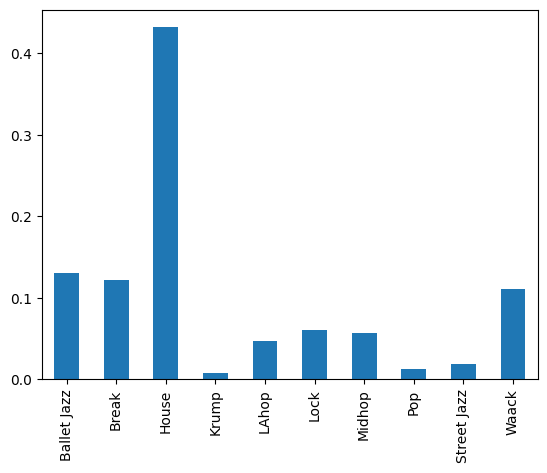

In [44]:
import matplotlib.pyplot as plt

Housedf = yprobdf[yprobdf['True_Label']=='House']
#remove original index, true label, and id
Housedf = Housedf.drop(['Original Index', 'True_Label', 'id'], axis=1)

#plot the mean probabilities per label among house pieces
Housedf.mean().plot(kind='bar')

Try some plots

In [27]:
from sklearn.calibration import CalibratedClassifierCV
calibrxgb = CalibratedClassifierCV(xgb_mod, cv='prefit', method='sigmoid')

calibrxgb.fit(X_valid, y_validxgb)
y_hatpc = calibrxgb.predict_proba(X_test)
print(y_hatpc.shape)
print('Calibrated XGBoost is...worse? Score =',calibrxgb.score(X_test, y_test))

(100, 10)
Calibrated XGBoost is...worse? Score = 0.57


##### Now for auto-sklearn. The two main parameters for auto-sklearn are:   
- time_left_for_this_task, optional (default=3600): Time limit in seconds for the search of appropriate models. By increasing this value, auto-sklearn has a higher chance of finding better models.  
- per_run_time_limit, optional (default=1/10 of time_left_for_this_task): Time limit for a single call to the machine learning model. Model fitting will be terminated if the machine learning algorithm runs over the time limit. Set this value high enough so that typical machine learning algorithms can be fit on the training data.


In [ ]:
#todo, edit below based on jupyter notebook from lab box

In [ ]:
# Instantiate an automl classifier model object with time limits
automl = autosklearn.classification.AutoSklearnClassifier(
        time_left_for_this_task=400,
        per_run_time_limit=50
)

# Fit the classifier to training data
automl.fit(X_train, y_train)
print('Score =', automl.score(X_test, y_test))

In [ ]:
# Model search statistics
print(automl.sprint_statistics())

In [ ]:
# Model Description
print(automl.show_models())

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
calibr = CalibratedClassifierCV(automl, cv='prefit', method='isotonic')

calibr.fit(X_valid, y_valid)
y_hatp = calibr.predict_proba(X_test)